In [2]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [3]:
# training data
print(x_train.shape, y_train.shape)
print(y_train)

# test data
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


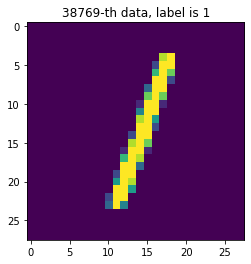

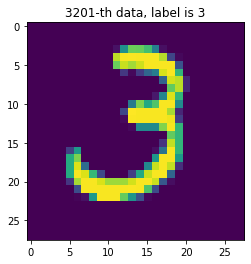

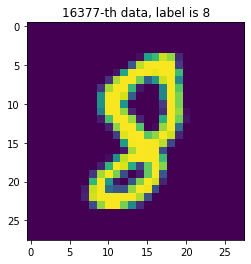

In [5]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# get 3 ingeter randomly from 0 ~ 59999
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title(f"{idx}-th data, label is {label}")

In [6]:
from sklearn.model_selection import train_test_split

# train-validation-split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(f"  training data {x_train.shape} label {y_train.shape}")
print(f"validation data {x_val.shape} label {y_val.shape}")

  training data (42000, 28, 28) label (42000,)
validation data (18000, 28, 28) label (18000,)


In [7]:
num_x_train = x_train.shape[0]
num_x_val   = x_val.shape[0]
num_x_test  = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val   = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test  = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)

(42000, 784)


In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val   = to_categorical(y_val)
y_test  = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (784, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy',
    metrics = ['acc'])

In [12]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4804 - acc: 0.8695 - val_loss: 0.2482 - val_acc: 0.9286
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2104 - acc: 0.9400 - val_loss: 0.1914 - val_acc: 0.9447
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1594 - acc: 0.9534 - val_loss: 0.1613 - val_acc: 0.9543
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1288 - acc: 0.9630 - val_loss: 0.1400 - val_acc: 0.9588
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1065 - acc: 0.9685 - val_loss: 0.1403 - val_acc: 0.9583
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0905 - acc: 0.9733 - val_loss: 0.1277 - val_acc: 0.9613
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0786 - acc: 0.9771 - val_loss: 0.1162 - val_acc: 0.9639
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [13]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

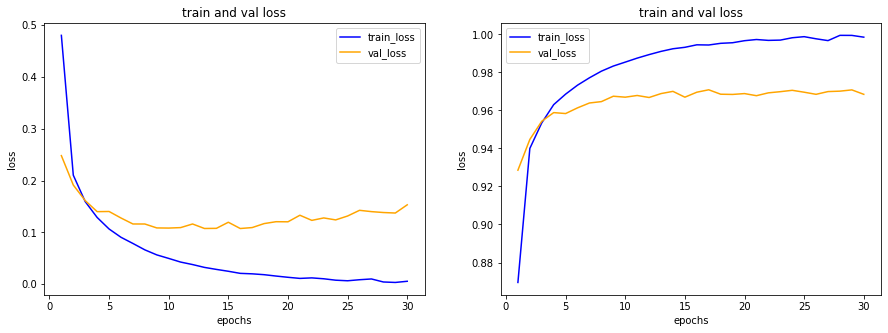

In [18]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label='train_loss')
ax2.plot(epochs, val_acc, color='orange', label='val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1472 - acc: 0.9686


[0.1471707820892334, 0.9685999751091003]

In [21]:
import numpy as np

results = model.predict(x_test)
print(results.shape)

print(f"각 클래스에 속할 확률: \n{results[0]}")

(10000, 10)
각 클래스에 속할 확률: 
[1.0362661e-05 3.9543974e-10 9.5535837e-09 1.6157027e-07 1.1448779e-13
 4.1972956e-10 7.4600385e-15 9.9998200e-01 7.9383064e-08 7.4282761e-06]


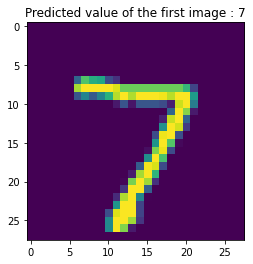

In [22]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis=-1)
plt.imshow(x_test[0].reshape(28, 28))
plt.title(f"Predicted value of the first image : {arg_results[0]}")
plt.show()

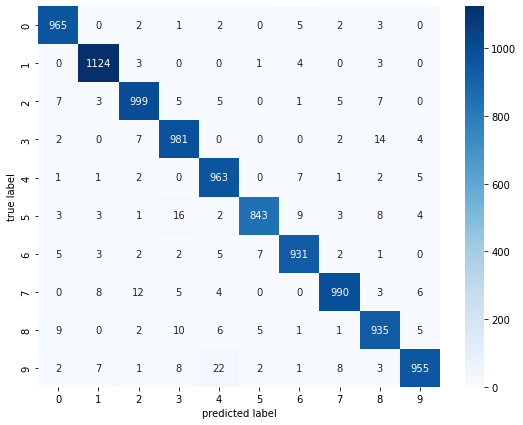

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()